# California Housing Prices

### Introduction:
This project focuses on predicting house prices based on median income using a straightforward linear regression model. The dataset employed comes from the 1990 California census, as highlighted in Aurélien Géron's book, "Hands-On Machine Learning with Scikit-Learn and TensorFlow." This dataset is particularly suitable for those new to machine learning because of its manageable size, clear variable definitions, and the basic data cleaning required.

The California housing dataset includes information on houses across various districts in California, summarizing statistics from the 1990 census. Although it may not reflect current housing prices, it provides a practical and accessible entry point for learning the fundamentals of machine learning. Key features of the dataset include longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, and ocean proximity.

Throughout this project, we will delve into the relationship between median income and house prices. We will clean the data, construct and evaluate a linear regression model, and discuss potential improvements for future analysis. The knowledge gained from this exercise will establish a strong foundation for tackling more complex machine learning tasks and methodologies.

## Step 1: Problem Definition
- Target Variable: `median_house_value`
- Feature: `median_income`

## Step 2: Data Exploration and Preprocessing

In [2]:
import pandas as pd

# Load datasets
df = pd.read_csv('/kaggle/input/housing/housing.csv')

# Display the first few rows of the training dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

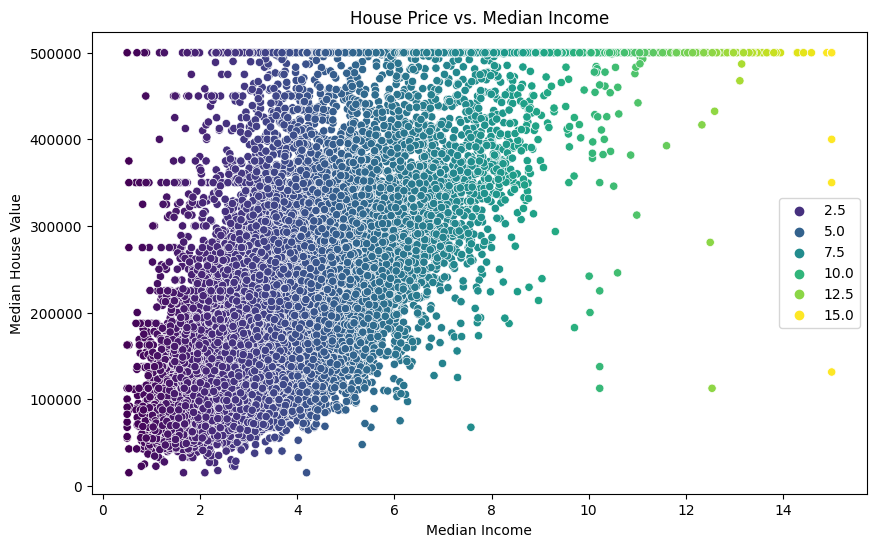

In [14]:
# Display basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the relationship between house prices and median income
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, hue='median_income', palette='viridis')  
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('House Price vs. Median Income')
plt.legend()  # Add legend to show colormap association
plt.show()

### Basic Statistics and Missing Values:
- The dataset contains some missing entries in the `total_bedrooms` column, specifically 207 missing values. 
- Key statistics reveal that the median income spans from about 0.5 to 15, while the median house value ranges from approximately 15,000 to 500,000.

### Visualizing the Relationship:
- A scatter plot illustrating the relationship between median income and median house value shows a positive correlation. 

### Handling Missing Values
- To address the missing values in the `total_bedrooms` column, we have two options, dropping the rows with missing data or imputing them. For simplicity, we will proceed by removing these rows.



## Step 3: Splitting the Data
Let's clean the data by handling missing values and then split the dataset into training and testing sets.

In [15]:
# Drop rows with missing values in 'total_bedrooms'
df_cleaned = df.dropna(subset=['total_bedrooms'])

# Splitting the data
from sklearn.model_selection import train_test_split

X = df_cleaned[['median_income']]
y = df_cleaned['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
len(X_train), len(X_test), len(y_train), len(y_test)

(16346, 4087, 16346, 4087)

### Data Splitting Results:
- Training set: 16,346 rows
- Testing set: 4,087 rows

## Step 4: Model Training

We will create and train the linear regression model using the training data.

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Step 5: Model Evaluation
We will evaluate the model's performance using the training data and plot the regression line.

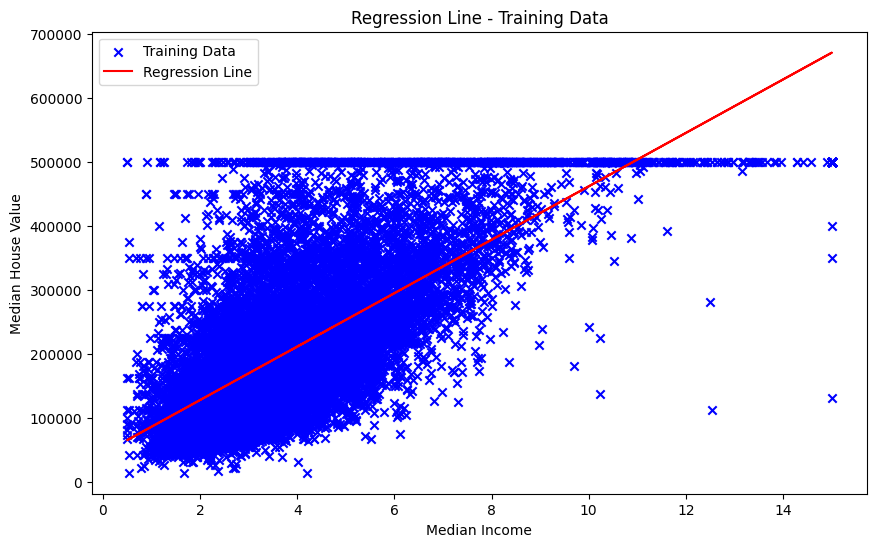

MAE: 62368.91172051588
MSE: 6958618210.4815235
R²: 0.47430066366395796


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_pred = model.predict(X_train)

# Evaluation metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data', marker='x')  
plt.plot(X_train, y_train_pred, color='red', label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Regression Line - Training Data')
plt.legend()
plt.show()

print(f"MAE: {mae}")  # Print evaluation metrics
print(f"MSE: {mse}")
print(f"R²: {r2}")

### Model Evaluation Results:
- Mean Absolute Error (MAE): 62,368.91
- Mean Squared Error (MSE): 6,958,618,210.48
- R-squared (R²): 0.4743
    
The regression line shows the predicted relationship between median income and median house value on the training data.

## Step 6: Prediction
Let's use the trained model to predict house prices on the testing set and compare the predicted prices with the actual prices.

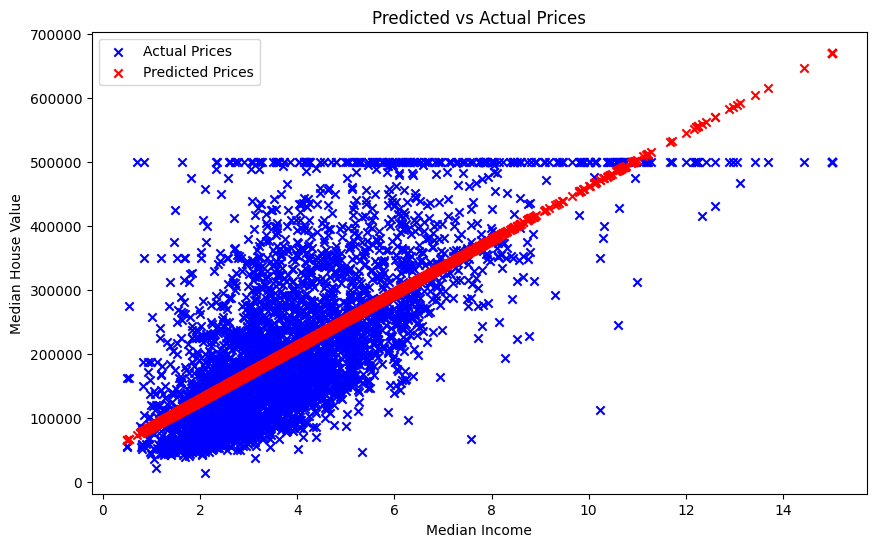

In [26]:
y_test_pred = model.predict(X_test)

# Compare predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', marker='x')
plt.scatter(X_test, y_test_pred, color='red', label='Predicted Prices', marker='x')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Step 7: Conclusion and Reporting

### Summary of Findings:
- There's a noticeable positive correlation between median income and median house value. 
- When using a linear regression model with median income as the predictor, the model accounts for approximately **47.43%** of the variance in house prices **(R² = 0.4743).** 
- The model's performance on the training data is quantified by a **Mean Absolute Error (MAE)** of **62,368.91**, reflecting the average absolute difference between the actual and predicted house prices.

### Model Performance:
- The model demonstrates reasonable performance, yet a significant portion of variance remains unexplained, indicating that other factors likely influence house prices. 
- The scatter plot of predicted versus actual prices shows that although the model captures the overall trend, its accuracy diminishes when predicting extreme values.

### Potential Improvements:
- To enhance the model's performance, consider incorporating additional features such as housing median age, total rooms, total bedrooms, population, households, and ocean proximity. 
- Additionally, experimenting with more complex models like polynomial regression, decision trees, or ensemble methods can help capture non-linear relationships. It's also beneficial to conduct hyperparameter tuning to optimize the model's parameters.